# 一、概述

回归是一种应用广泛的预测建模技术，这种技术的核心在于预测的结果是**连续型**变量。回归算法源于统计学理论，是结合机器学习与统计学的重要算法。通常来说，统计学注重**先验**，而机器学习看重**结果**，因此机器学习中不会提前为线性回归排除共线性等可能会影响模型的因素，反而会先建立模型以查看效果。模型确立之后，如果效果不好，再根据统计学的指导排除可能影响模型的因素。

类/函数|含义
:-|:-
**普通线性回归**|
sklearn.linear_model.LinearRegression|使用普通最小二乘法的线性回归
**岭回归**|
sklearn.linear_model.Ridge|岭回归，一种将L2作为正则化工具的线性最小二乘回归
sklearn.linear_model.RidgeCV|带交叉验证的岭回归
sklearn.linear_model.RidgeClassifier|岭回归的分类器
sklearn.linear_model.RidgeClassifierCV|带交叉验证的岭回归的分类器
sklearn.linear_model.ridge_regression|【函数】用正太方程法求解岭回归
**LASSO**|
sklearn.linear_model.Lasso|Lasso，使用L1作为正则化工具来训练的线性回归模型
sklearn.linear_model.LassoCV |带交叉验证和正则化迭代路径的Lasso
sklearn.linear_model.LassoLars|使用最小角度回归求解的Lasso
sklearn.linear_model.LassoLarsCV|带交叉验证的使用最小角度回归求解的Lasso
sklearn.linear_model.LassoLarsIC|使用BIC或AIC进行模型选择的，使用最小角度回归求解的Lasso
sklearn.linear_model.MultiTaskLasso|使用L1/L2混合范数作为正则化工具训练的多标签Lasso
sklearn.linear_model.MultiTaskLassoCV|使用L1/L2混合范数作为正则化工具训练的，带交叉验证的多标签Lasso
sklearn.linear_model.lasso_path|【函数】用坐标下降计算Lasso路径
**弹性网**|
sklearn.linear_model.ElasticNet|弹性网，一种将L1和L2组合作为正则化工具的线性回归
sklearn.linear_model.ElasticNetCV|带交叉验证和正则化迭代路径的弹性网
sklearn.linear_model.MultiTaskElasticNet|多标签弹性网
sklearn.linear_model.MultiTaskElasticNetCV|带交叉验证的多标签弹性网
sklearn.linear_model.enet_path|【函数】用坐标下降法计算弹性网的路径
**最小角度回归**|
sklearn.linear_model.Lars|最小角度回归（Least Angle Regression，LAR）
sklearn.linear_model.LarsCV|带交叉验证的最小角度回归模型
sklearn.linear_model.lars_path |【函数】使用LARS算法计算最小角度回归路径或Lasso的路径
**正交匹配追踪**|
sklearn.linear_model.OrthogonalMatchingPursuit|正交匹配追踪模型（OMP）
sklearn.linear_model.OrthogonalMatchingPursuitCV | 交叉验证的正交匹配追踪模型（OMP）
sklearn.linear_model.orthogonal_mp |【函数】正交匹配追踪（OMP）
sklearn.linear_model.orthogonal_mp_gram| 【函数】Gram正交匹配追踪（OMP）
**贝叶斯回归**|
sklearn.linear_model.ARDRegression|贝叶斯ARD回归。ARD是自动相关性确定回归（Automatic Relevance Determination Regression），是一种类似于最小二乘的，用来计算参数向量的数学方法。
sklearn.linear_model.BayesianRidge|贝叶斯岭回归
**其他回归**
sklearn.linear_model.PassiveAggressiveClassifier|被动攻击性分类器
sklearn.linear_model.PassiveAggressiveRegressor|被动攻击性回归
sklearn.linear_model.Perceptron|感知机
sklearn.linear_model.RANSACRegressor|RANSAC（RANdom SAmple Consensus）算法
sklearn.linear_model.HuberRegressor|胡博回归，对异常值具有鲁棒性的一种线性回归模型
sklearn.linear_model.SGDRegressor|通过最小化SGD的正则化损失函数来拟合线性模型
sklearn.linear_model.TheilSenRegressor|Theil-Sen估计器，一种鲁棒的多元回归模型

# 二、多元线性回归

## （一）基本原理

$$\hat{y}=w_{0}+w_{1}x_{1}++w_{2}x_{2}+…++w_{n}x_{n}=Xw$$

$y$和$x$是粗体，其中$y$是包含了m个全部的样本的回归结果的列向量，$w$是一个结构为(n+1,1)的列矩阵，$X$是一个结构为(m,n+1)的特征矩阵。

线性回归的任务，就是构造一个预测函数来映射输入的特征矩阵$X$和标签值$y$的线性关系，而构造预测函数的核心就是找出模型的参数向量$w$。在多元线性回归中，损失函数如下定义：$$\sum_{i=1}^{m}(y_i-X_iw)^2=\sum_{i=1}^{m}(y_i-\hat{y})^2$$其中，$y_i$是样本i对应的真实标签；$\hat{y}_i$，即$X_iw$，是样本$i$在一组参数$w$下的预测标签。

求解目标可以转化成：$$min_{w}||y-Xw||_2 ^2$$其中右下角的2表示向量$y-Xw$的L2范式，也就是损失函数所代表的含义。在L2范式上开平方，就是损失函数。这个式子，也正是sklearn当中，用在类Linear_model.LinerRegression背后使用的损失函数，往往称为SSE（Sum of Sqaured Error，误差平方和）或者RSS（Residual Sum of Squares 残差平方和）。

## （二）最小二乘法求解多元线性回归参数

通过最小化真实值和预测值之间的RSS来求解参数的方法叫做**最小二乘法**。求解极值的第一步往往是求解一阶导数并让一阶导数等于0，因此，现在残差平方和RSS上对参数向量$w$求导，最终得到（能手推）$$w=(X^{T}X)^{-1}X^{T}y$$这里**逆矩阵存在**的充分必要条件是**特征矩阵不存在多重共线性**。求解$X^{T}X$的方法是奇异值分解。在统计学中，使用最小二乘法来求解线性回归的方法是一种**无偏估计**的方法，这种无偏估计要求因变量（标签）$y$必须服从**正态分布**，即必须**正太化处理**，比如取对数。

## （三）linear_model.LinearRegression

`sklearn.linear_model.LinearRegression`(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

参数|含义
:-|:-
fit_intercept|布尔值，可不填，默认为True<br>是否计算此模型的截距。如果设置为False，则不会计算截距。
normalize|布尔值，可不填，默认为False<br>当fit_intercept设置为False时，将忽略此参数。如果为True，则特征矩阵X在进入回归之前将会被减去均值（中心化）并除以L2范式（缩放）。如果你希望进行标准化，请在fit数据之前使用preprocessing模块中的标准化专用类StandardScaler。
copy_X|布尔值，可不填，默认为True<br>如果为真，将在X.copy()上进行操作，否则的话原本的特征矩阵X可能被线性回归影响并覆盖。
n_jobs|整数或者None，可不填，默认为None<br>用于计算的作业数。只在多标签的回归和数据量足够大的时候才生效。除非None在joblib.parallel_backend上下文中，否则None统一表示为1。如果输入-1，则表示使用全部的CPU来进行计算。

这些参数中没有一个是必填的，更没有对模型有不可替代作用的参数。这说明，线性回归的性能往往取决于数据本身，而并非调参能力，线性回归也因此对数据有着很高的要求。sklearn中的线性回归可以处理多标签问题，只需要在fit的时候输入多维度标签就可以了。

### 1.导入需要的模块和库

In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房屋价值数据集
import pandas as pd

### 2.导入数据，探索数据

In [2]:
housevalue = fch() #实例化数据集
X = pd.DataFrame(housevalue.data) #放入DataFrame中便于查看
y = housevalue.target

In [3]:
X.shape

(20640, 8)

In [4]:
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

MedInc：该街区住户的收入中位数<br>
HouseAge：该街区房屋使用年代的中位数<br>
AveRooms：该街区平均的房间数目<br>
AveBedrms：该街区平均的卧室数目<br>
Population：街区人口<br>
AveOccup：平均入住率<br>
Latitude：街区的纬度<br>
Longitude：街区的经度

In [6]:
X.columns = housevalue.feature_names

In [7]:
y.shape

(20640,)

特征存在量纲不统一的问题，需要标准化。

In [8]:
y.min()

0.14999

In [9]:
y.max()

5.00001

### 3.分训练集和测试集

In [10]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0]) #还原索引顺序
Xtrain.shape

(14448, 8)

### 4.建模

#### （1）未标准化

In [11]:
reg = LR().fit(Xtrain, Ytrain)
yhat = reg.predict(Xtest)
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [12]:
yhat.min()

-0.6528439725035966

In [13]:
yhat.max()

7.146198214270875

出现了真实标签范围之外的值，可能拟合效果不是很好。

#### （2）标准化（影响不大）

In [14]:
reg_nor = LR(normalize=True).fit(Xtrain, Ytrain)
yhat_nor = reg_nor.predict(Xtest)
yhat_nor

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

### 5.探索建好的模型

属性|含义
:-|:-
coef_|数组，形状为(n_features, )或者(n_targets, n_features)<br>线性回归方程中估计出的系数。如果在fit中传递多个标签（当y为二维或以上的时候），则返回的系数是形状为（n_targets，n_features）的二维数组，而如果仅传递一个标签，则返回的系数是长度为n_features的一维数组。
intercept_ |数组，线性回归中的截距项。

#### （1）未标准化

In [15]:
reg.coef_ #估计出的系数

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [16]:
[*zip(Xtrain.columns,reg.coef_)]

[('MedInc', 0.4373589305968403),
 ('HouseAge', 0.010211268294494038),
 ('AveRooms', -0.10780721617317715),
 ('AveBedrms', 0.6264338275363783),
 ('Population', 5.216125353178735e-07),
 ('AveOccup', -0.0033485096463336094),
 ('Latitude', -0.4130959378947711),
 ('Longitude', -0.4262109536208467)]

In [17]:
reg.intercept_ #截距

-36.25689322920386

#### （2）标准化（影响不大）

In [18]:
reg_nor.coef_ #估计出的系数

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [19]:
[*zip(Xtrain.columns,reg_nor.coef_)]

[('MedInc', 0.4373589305968401),
 ('HouseAge', 0.010211268294494032),
 ('AveRooms', -0.10780721617317679),
 ('AveBedrms', 0.6264338275363788),
 ('Population', 5.216125353264395e-07),
 ('AveOccup', -0.0033485096463335795),
 ('Latitude', -0.4130959378947717),
 ('Longitude', -0.42621095362084777)]

In [20]:
reg_nor.intercept_ #截距

-36.25689322920398

# 三、回归类的模型评估指标

## （一）是否预测了正确的数值

RSS有着致命的缺点：它是一个无界的和，可以无限大，从RSS的公式来看，它不能为负，所以RSS越接近0越好，但究竟多小才算好，多接近0才算好？为了应对这种状况，sklearn中使用RSS的变体，均方误差MSE（mean squared error）来衡量预测值和真实值的差异：

$$MSE=\frac{1}{m}\sum_{i=1}^{m}(y_i-\hat{y}_i)^2$$

均方误差，本质是在RSS的基础上除以样本总量，得到了每个样本量上的平均误差。有了平均误差，就可以将平均误差和标签的取值范围在一起比较，以此获得一个较为可靠的评估依据。sklearn中有两种方式调用这个评估指标，一种是使用sklearn专用的模型评估模块metrics里的类mean_squared_error，另一种是调用交叉验证的类cross_val_score并使用里面的scoring参数使用均方误差。

In [21]:
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat,Ytest)

0.5309012639324571

In [22]:
Ytest.mean() #预测结果误差大

2.0819292877906976

In [23]:
y.max()

5.00001

In [24]:
y.min()

0.14999

In [25]:
cross_val_score(reg,X,y,cv=10,scoring='neg_mean_squared_error')

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

除了MSE，还有与MSE类似的MAE（Mean absolute error，绝对均值误差）：

$$MAE=\frac{1}{m}\sum_{i=0}^{m-1}|y_i-\hat{y}_i|$$

其表达的概念与均方误差完全一致，不过在真实标签和预测值之间的差异外使用的是L1范式（绝对值）。现实使用中，MSE和MAE选一个来使用就好了。在sklearn当中，使用命令from sklearn.metrics import mean_absolute_error来调用MAE，同时，也可以使用交叉验证中的scoring = "neg_mean_absolute_error"，以此在交叉验证时调用MAE。

## （二）是否拟合了足够的信息

$R^{2}$衡量了模型对数据上的信息量的捕捉：

$$R^{2}=1-\frac{\sum_{i=0}^{m}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{m}(y_i-\bar{y}_i)^2}=1-\frac{RSS}{\sum_{i=0}^{m}(y_i-\bar{y}_i)^2}$$

其中$y$是真实标签，$\hat{y}$是预测结果，$\bar{y}$是均值，$y_i-\bar{y}$除以样本量m是方差。方差的本质是任意一个$y$值和样本均值的差异，差异越大，这些值所带的信息越多。在$R^2$中，分子是真实值和预测值之间的差值，也就是模型没有捕获到的信息总量，分母是真实标签所带的信息量，所以其衡量的是1-模型没有捕获到的信息量占真实标签中所带的信息量的比例，所以$R^2$越接近1越好。

$R^2$可以使用三种方式来调用，一是从metrics中导入r2_score，输入预测值和真实值后打分；二是从线性回归LinearRegression的接口score调用；三是在交叉验证中，输入"r2"调用。

In [26]:
#从metrics中导入r2_score
from sklearn.metrics import r2_score
r2_score(y_true=Ytest,y_pred=yhat) #真实值，预测值

0.6043668160178817

In [27]:
#从线性回归LinearRegression的接口score调用
r2 = reg.score(Xtest,Ytest) #特征矩阵，标签
r2

0.6043668160178817

In [28]:
#交叉验证
cross_val_score(reg,X,y,cv=10,scoring='r2')

array([0.48254494, 0.61416063, 0.42274892, 0.48178521, 0.55705986,
       0.5412919 , 0.47496038, 0.45844938, 0.48177943, 0.59528796])

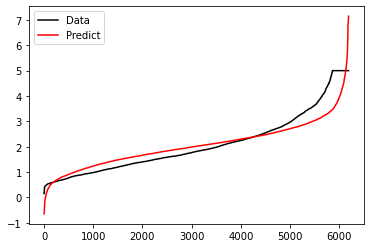

In [29]:
#画图-Ytest与Yhat
import matplotlib.pyplot as plt
sorted(Ytest) #从小到大排序
plt.plot(range(len(Ytest)),sorted(Ytest),c='black',label='Data')
plt.plot(range(len(yhat)),sorted(yhat),c='red',label='Predict')
plt.legend()
plt.show()

大部分数据被拟合得比较好，但是图像的开头和结尾处有较大的拟合误差。如果在图像右侧分布着更多的数据，模型就会越来越偏离真正的标签。

**拓展**

In [30]:
import numpy as np
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2')

array([-179.12952605,   -5.692624  ,  -15.61747513,  -78.68042858,
        -59.5311006 ])

$R^2$出现了负数，因为SST=SSR+SSE不是永远成立的。

$$R^2=\frac{ESS+2\sum_{i=0}^{m}(y_i-\hat{y}_i)(\hat{y}_i-\bar{y}_i)}{TSS}≠\frac{ESS}{TSS}$$

对于$x_i$来说，真实标签减预测值的值$(y_i-\hat{y}_i)$为正，但预测值$(\hat{y}_i-\bar{y}_i)$却是一个负数，这说明，数据本身的均值比拟合模型更接近数据的真实值，此时模型是废的，完全没有作用，说明线性回归模型不适合数据，需要更换模型。